In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cars=pd.read_csv("CarPrice_Assignment.csv")

# Agenda: Geely Auto wants to enter USA Market
# 1. Factors affecting pricing of cars
# 2. Which variables are significant in 
#    predicting the price of a car,
# 3. How Well those variables describing price
# sns.pairplot(cars)
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:

# Catgorical Variables
# 1. Fueltype => ['gas', 'diesel']
# 2. Aspiration =>['std', 'turbo']
# 3. door number =>['two', 'four']
# 4. carboday =>['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
# 5  drive wheel =>['rwd', 'fwd', '4wd']
# 6  engine location =>['front', 'rear']
# 7. fuelsystem =>['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']
# 8. engine type =>['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']
# 9. cylindernumbers =>['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
# cars.fueltype.describe()
cars["fueltype"]=cars["fueltype"].map({"gas":1,"diesel":0})
cars.aspiration=cars["aspiration"].map({"std":1,"turbo":0})
cars.doornumber=cars["doornumber"].map({"two":1,"four":0})
cars.enginelocation=cars.enginelocation.map({"front":1,"rear":0})

# cars["sedan"]=cars.carbody.apply(lambda s:1 if s=="sedan" else 0)
# cars["hatchback"]=cars.carbody.apply(lambda s:1 if s=="hatchback" else 0)
# cars["convertible"]=cars.carbody.apply(lambda s:1 if s=="convertible" else 0)
# cars["wagon"]=cars.carbody.apply(lambda s:1 if s=="wagon" else 0)



carbody=pd.get_dummies(cars.carbody,drop_first=True)
drive_wheel=pd.get_dummies(cars.drivewheel,drop_first=True)
fuelsystem=pd.get_dummies(cars.fuelsystem,drop_first=True)
enginetype=pd.get_dummies(cars.enginetype,drop_first=True)
cylindernumbers=pd.get_dummies(cars.cylindernumber,drop_first=True)
#Adding the results to the master dataframe
cars = pd.concat([cars,carbody,drive_wheel,fuelsystem,enginetype,cylindernumbers],axis=1)

In [4]:
cars.drop(["carbody","car_ID","drivewheel",
           "fuelsystem","enginetype","cylindernumber"
           ,"CarName"],axis=1,inplace=True)

In [5]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
cars = cars.apply(normalize) 
cars.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,0.433171,0.097561,0.180488,0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.721951,-0.073171,-0.063415,-0.019512,-0.053659,0.22439,-0.117073,-0.004878,-0.004878,-0.019512
1,0.433171,0.097561,0.180488,0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.721951,-0.073171,-0.063415,-0.019512,-0.053659,0.22439,-0.117073,-0.004878,-0.004878,-0.019512
2,0.033171,0.097561,0.180488,0.560976,0.014634,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,...,-0.721951,-0.073171,0.936585,-0.019512,-0.053659,-0.77561,0.882927,-0.004878,-0.004878,-0.019512
3,0.233171,0.097561,0.180488,-0.439024,0.014634,0.030420,0.038071,0.024350,0.047927,-0.084781,...,0.278049,-0.073171,-0.063415,-0.019512,-0.053659,0.22439,-0.117073,-0.004878,-0.004878,-0.019512
4,0.233171,0.097561,0.180488,-0.439024,0.014634,0.018758,0.038071,0.041016,0.047927,0.104125,...,0.278049,-0.073171,-0.063415,-0.019512,0.946341,-0.77561,-0.117073,-0.004878,-0.004878,-0.019512


In [6]:
X=cars[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',  'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two']]
y=cars["price"]

In [7]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

/home/abhi/venvs/notebook/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()
print (lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     46.66
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           4.95e-50
Time:                        03:23:45   Log-Likelihood:                 241.50
No. Observations:                 143   AIC:                            -403.0
Df Residuals:                     103   BIC:                            -284.5
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0311      0.036  

In [9]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [10]:
# Calculating Vif value
vif_cal(input_data=cars, dependent_col="price")

/home/abhi/venvs/notebook/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
42,two,inf
36,rotor,inf
26,idi,inf
1,fueltype,inf
13,compressionratio,184.330000
38,four,68.930000
10,enginesize,49.510000
16,citympg,39.270000
17,highwaympg,36.370000
9,curbweight,33.680000


In [11]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

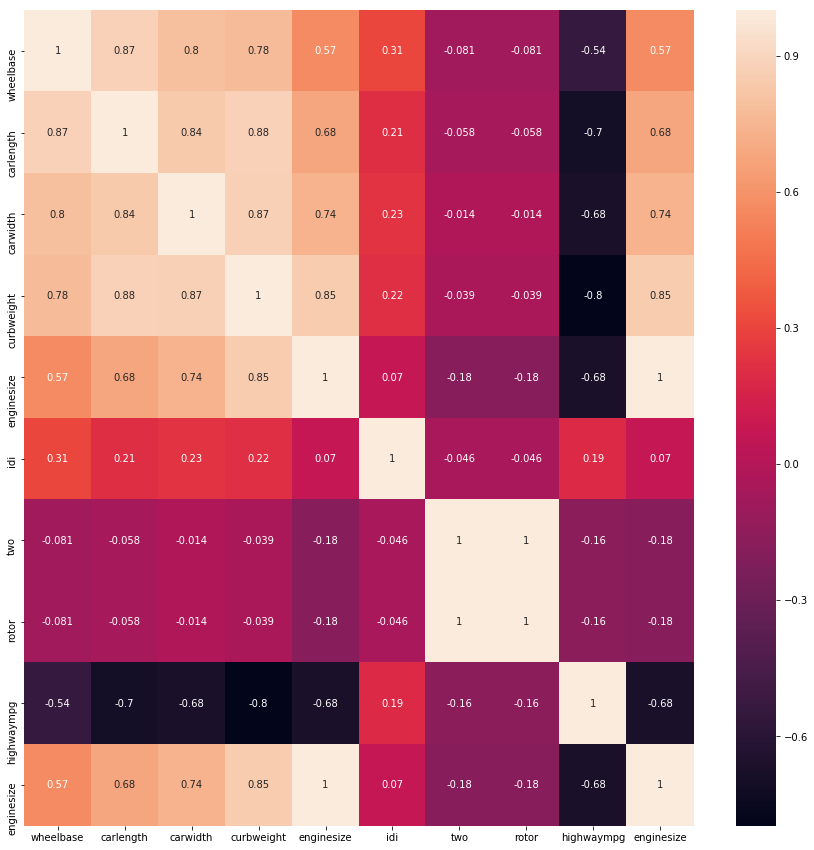

In [12]:
# Let's see the correlation matrix 
plt.figure(figsize = (15,15))     # Size of the figure
sns.heatmap(cars[["wheelbase","carlength","carwidth","curbweight","enginesize","idi","two","rotor","highwaympg","enginesize"]].corr(),annot = True)
# removing curbweight,carweidth,carlength

In [13]:
# plt.figure(figsize = (45,45))     # Size of the figure
# sns.heatmap(cars[["boreratio","stroke","idi","fueltype"]].corr(),annot = True)
# cars.drop(["curbweight","carwidth","carlength"],axis=0,inplace=True)
cars.drop(["curbweight","carwidth","carlength","idi","two","rotor","highwaympg","enginesize","fueltype"],axis=1,inplace=True)


In [14]:
X_train = X_train.drop(["curbweight","carwidth","carlength","idi","two","rotor","highwaympg","enginesize"], 1)

In [15]:
lm_2 = sm.OLS(y_train,X_train).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     36.99
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           2.30e-45
Time:                        03:23:47   Log-Likelihood:                 211.08
No. Observations:                 143   AIC:                            -354.2
Df Residuals:                     109   BIC:                            -253.4
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0825      0.041  

In [16]:
vif_cal(input_data=cars, dependent_col="price")

,Var,Vif
9,horsepower,21.50
30,four,21.21
14,sedan,16.05
17,rwd,13.19
13,hatchback,12.23
21,mpfi,9.09
16,fwd,8.99
15,wagon,8.63
11,citympg,7.80
31,six,7.50


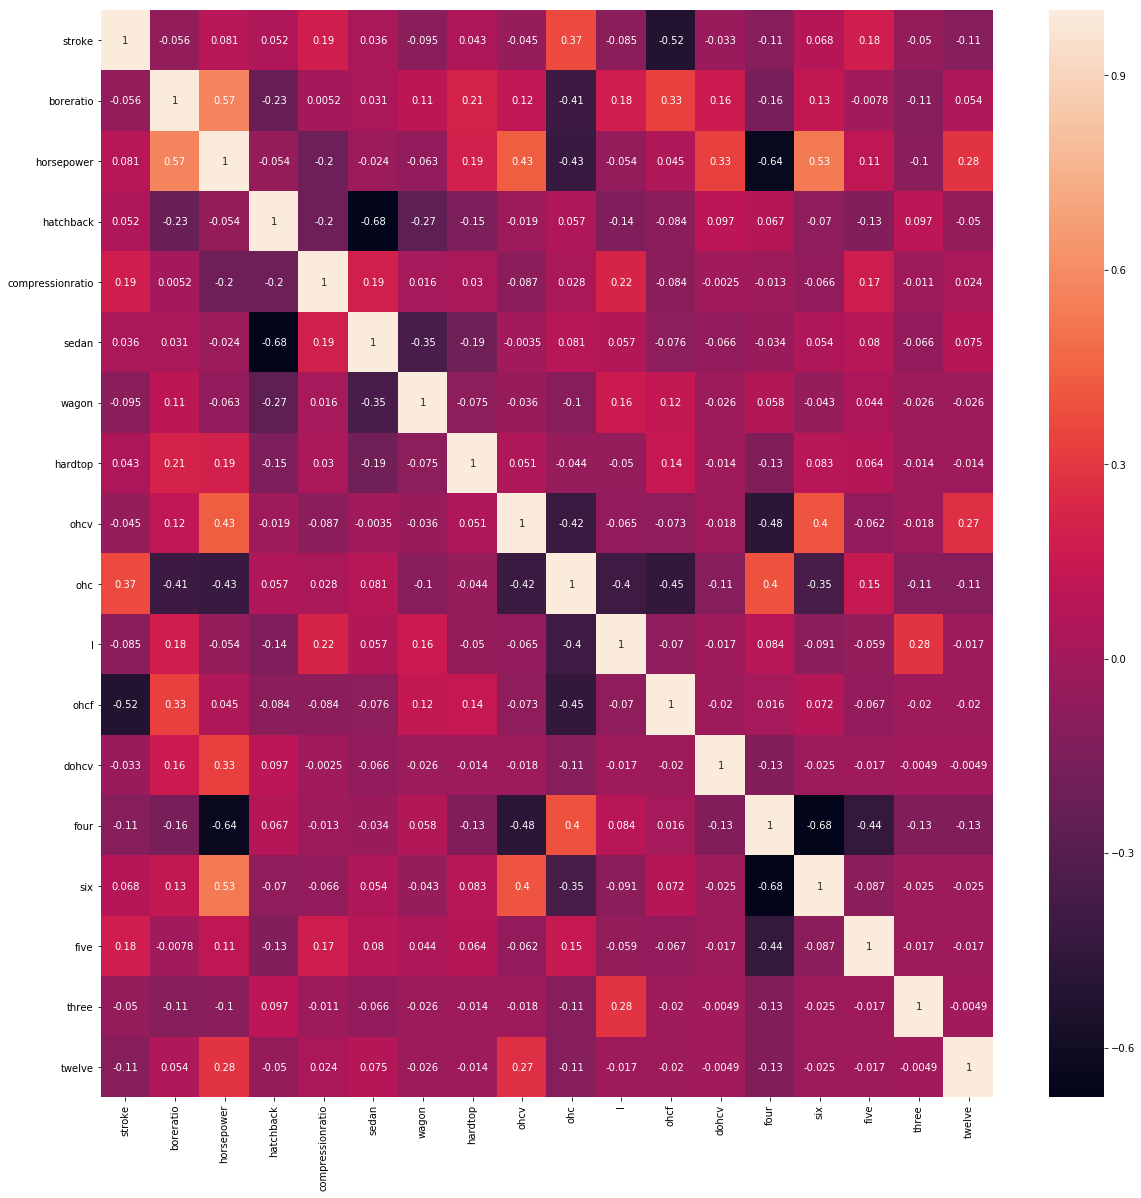

In [17]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))     # Size of the figure
sns.heatmap(cars[["stroke","boreratio","horsepower",'hatchback', "compressionratio",'sedan', 'wagon', 'hardtop','ohcv', 'ohc', 'l','ohcf', 'dohcv','four', 'six', 'five', 'three', 'twelve',]].corr(),annot = True)
# highwaympg and citympg are colliner,horsepower and enginesize are colliner

In [18]:

X_train = X_train.drop(["fueltype"], 1)

In [19]:
lm_2 = sm.OLS(y_train,X_train).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     37.87
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           8.22e-46
Time:                        03:23:50   Log-Likelihood:                 210.01
No. Observations:                 143   AIC:                            -354.0
Df Residuals:                     110   BIC:                            -256.2
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0784      0.041  

In [20]:
vif_cal(input_data=cars, dependent_col="price")





,Var,Vif
9,horsepower,21.50
30,four,21.21
14,sedan,16.05
17,rwd,13.19
13,hatchback,12.23
21,mpfi,9.09
16,fwd,8.99
15,wagon,8.63
11,citympg,7.80
31,six,7.50


In [21]:
cars.drop(["aspiration","doornumber","compressionratio"],axis=1,inplace=True)

In [22]:

X_train = X_train.drop(["aspiration","doornumber","compressionratio"], 1)

In [23]:
lm_3 = sm.OLS(y_train,X_train).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     42.88
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           3.20e-48
Time:                        03:23:51   Log-Likelihood:                 209.93
No. Observations:                 143   AIC:                            -359.9
Df Residuals:                     113   BIC:                            -271.0
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
symboling          0.0817      0.037      2.

In [24]:
vif_cal(input_data=cars, dependent_col="price")

,Var,Vif
27,four,19.18
11,sedan,14.97
6,horsepower,13.30
14,rwd,12.64
10,hatchback,12.18
13,fwd,8.90
12,wagon,8.07
28,six,7.34
8,citympg,7.21
2,wheelbase,6.99


In [25]:
cars.drop(["l","four","boreratio","symboling","rwd","sedan","three","ohc","ohcv","five","carheight","hardtop","spfi","mfi","4bbl","2bbl","mpfi","ohcf","spdi","wheelbase"],axis=1,inplace=True)

In [26]:

X_train = X_train.drop(["l","four","boreratio","symboling","rwd","sedan","three","ohc","ohcv","five","carheight","hardtop","spfi","mfi","4bbl","2bbl","mpfi","ohcf","spdi","wheelbase"], 1)

In [27]:
lm_4 = sm.OLS(y_train,X_train).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     42.46
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           5.20e-38
Time:                        03:23:52   Log-Likelihood:                 140.33
No. Observations:                 143   AIC:                            -258.7
Df Residuals:                     132   BIC:                            -226.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation    -0.1493      0.103     -1.

In [28]:
vif_cal(input_data=cars, dependent_col="price")

,Var,Vif
2,horsepower,6.82
4,citympg,4.03
7,fwd,1.75
9,six,1.72
8,dohcv,1.54
0,enginelocation,1.38
10,twelve,1.36
1,stroke,1.18
3,peakrpm,1.18
5,hatchback,1.15


In [32]:
X_test_m4 = sm.add_constant(X_test[["symboling","enginelocation","stroke","peakrpm","citympg","hatchback","wagon","fwd","dohcv","six"]],has_constant='add')
y_pred_m4 = lm_4.predict(X_test_m4)


Text(0,0.5,'Housing Price')

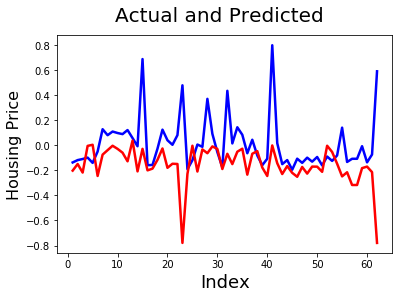

In [33]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
# len(y_test)
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m4, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label